## Name - Pranjal Sarkari

## Data Science & Business Analytics

## Task2 - Prediction using Unsupervised ML(Level Beginner)

## Objective:

In this unsupervised learning we will do some basics of K-means clustering to predict the optimum number of clusters and
represent it visually.

In [1]:
# Importing all useful library for this task.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Loading of iris dataset through dataset command
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# Shape of data
iris_df.shape

(150, 4)

In [3]:
# Info of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
#Full description(statistics) of the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Calculation of the optimum number of clusters for classification(K-means)


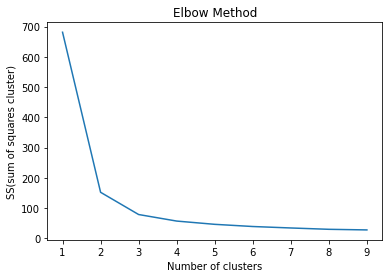

In [5]:
# To find the optimum number of clusters for classification(K-means)

from sklearn.cluster import KMeans 
SS = [] # Sum of squares cluster 

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df.values)
    SS.append(kmeans.inertia_) # Inertia is the sum of squared error for each cluster
    
# Now plotting our results onto a line graph for better evaluation i.e to find where 'elbow' occurs.
plt.plot(range(1, 10), SS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS(sum of squares cluster)')
plt.show()


Clearly optimum cluster is at the region where elbow occurs i.e when the SS(sum of squares cluster) not decreases significantly with every iteration.

## Creation of Kmeans classifier

In [6]:
# Making the kmeans classifier(taking n_clusters value as 3)
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(iris_df)
Y_kmeans.shape

(150,)

## Plotting the graph for Visualization


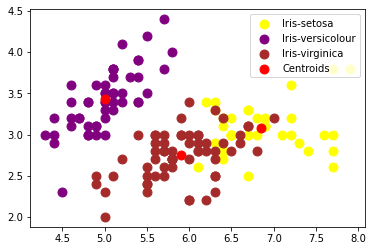

In [7]:
# Visualising the clusters on the first two columns
plt.scatter(iris_df.values[Y_kmeans == 0, 0], iris_df.values[Y_kmeans == 0, 1], 
            s = 80, c = 'yellow', label = 'Iris-setosa')
plt.scatter(iris_df.values[Y_kmeans == 1, 0], iris_df.values[Y_kmeans == 1, 1], 
            s = 80, c = 'purple', label = 'Iris-versicolour')
plt.scatter(iris_df.values[Y_kmeans == 2, 0], iris_df.values[Y_kmeans == 2, 1],
            s = 80, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'red', label = 'Centroids')

plt.legend(loc = 'upper right')